In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Wczytanie danych

In [2]:
users_df = pd.read_json("dane/users.jsonl", lines=True)
deliveries_df = pd.read_json("dane/deliveries.jsonl", lines=True)
products_df = pd.read_json("dane/products.jsonl", lines=True)
sessions_df = pd.read_json("dane/sessions.jsonl", lines=True)

### Funkcja rysująca wykres słupkowy

In [3]:
def plot_bar(series, title="", ylabel="", xlabel="", rotation=0):
    idx = series.index.tolist()
    for i in range(len(idx)):
        idx[i] = str(idx[i])
    plt.bar(idx, series.values)
    
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

# Analiza każdej tabeli z osobna

## Użytkownicy

In [4]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  200 non-null    int64 
 1   name     200 non-null    object
 2   city     200 non-null    object
 3   street   200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [5]:
users_df

,user_id,name,city,street
0,102,Nela Pawlos,Szczecin,plac Traugutta 217
1,103,Inga Chaberek,Kraków,aleja Strumykowa 79
2,104,Antoni Kargol,Szczecin,ulica Plażowa 54/27
3,105,Justyna Gendek,Poznań,aleja Kasprowicza 23/54
4,106,Aleks Kastelik,Radom,pl. Rejtana 41
...,...,...,...,...
195,297,Blanka Bryndza,Wrocław,aleja Reymonta 731
196,298,Mateusz Lejk,Warszawa,aleja Jeziorna 11
197,299,Stefan Dydo,Poznań,ul. Brzechwy 749
198,300,Marcin Windak,Szczecin,plac Ceglana 48


In [6]:
users_df["city"].value_counts()

Kraków      35
Szczecin    31
Poznań      31
Gdynia      30
Radom       30
Warszawa    22
Wrocław     21
Name: city, dtype: int64

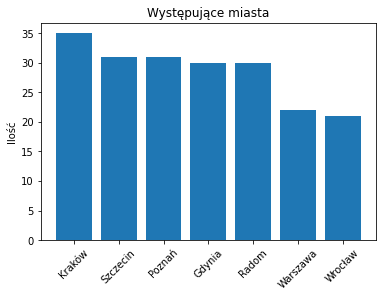

In [7]:
cities = users_df["city"].value_counts()
plot_bar(series=cities, title="Występujące miasta", ylabel="Ilość", rotation=45)

W przypadku tabeli "Users" nie występują żadne braki danych, jednak w atrybucie "street" występują niejednoznaczne zapisy nazw ulic - skrót ul. oraz pełna nazwa "ulica". Najczęściej występującym miastem jest Poznań, a najrzadziej - Radom. Użytkownicy są tylko z miast oraz w kilku województwach nie ma użytkowników.

## Dostawy

In [8]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7171 entries, 0 to 7170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   purchase_id         7171 non-null   int64  
 1   purchase_timestamp  7171 non-null   object 
 2   delivery_timestamp  6834 non-null   object 
 3   delivery_company    6810 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 224.2+ KB


In [9]:
deliveries_df["purchase_timestamp"] = pd.to_datetime(deliveries_df["purchase_timestamp"], 
                                                     format='%Y-%m-%dT%H:%M:%S')
deliveries_df["delivery_timestamp"] = pd.to_datetime(deliveries_df["delivery_timestamp"], 
                                                     format='%Y-%m-%dT%H:%M:%S')

### Wyznaczenie przedziału atrybutu "purchase_timestamp"

In [10]:
deliveries_df["purchase_timestamp"].min()

Timestamp('2021-01-01 00:36:38')

In [11]:
deliveries_df["purchase_timestamp"].max()

Timestamp('2021-10-27 15:20:10')

### Liczność występujących miesięcy

In [12]:
deliveries_temp_df = deliveries_df.copy()
deliveries_temp_df["month"] = deliveries_temp_df["purchase_timestamp"].apply(lambda x:"%d" % (x.month))
deliveries_temp_df

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,month
0,20001,2021-09-12 14:40:47,NaT,620.0,9
1,20002,2021-03-02 16:49:15,2021-03-04 16:53:37,620.0,3
2,20003,2021-03-31 09:55:45,2021-04-03 09:57:37,360.0,3
3,20004,2021-03-21 18:03:57,2021-03-25 18:04:38,516.0,3
4,20005,2021-01-14 18:48:41,2021-01-19 18:52:53,516.0,1
...,...,...,...,...,...
7166,27167,2021-09-08 13:39:46,2021-09-13 13:39:59,360.0,9
7167,27168,2021-02-05 12:13:27,2021-02-07 12:14:48,360.0,2
7168,27169,2021-10-10 11:04:13,2021-10-13 11:05:03,516.0,10
7169,27170,2021-07-27 09:49:23,2021-08-01 09:52:10,620.0,7


In [13]:
deliveries_temp_df["month"].value_counts()

5     757
6     750
3     748
1     748
8     726
9     719
4     717
7     684
10    665
2     657
Name: month, dtype: int64

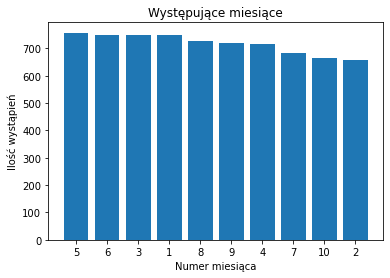

In [14]:
months = deliveries_temp_df["month"].value_counts()
plot_bar(series=months, title="Występujące miesiące", ylabel="Ilość wystąpień", xlabel="Numer miesiąca")

### Dodanie kolumny z czasem dostawy

In [15]:
deliveries_df["deliver_time"] = (deliveries_df["delivery_timestamp"] - deliveries_df["purchase_timestamp"])
deliveries_df["deliver_time"] = deliveries_df["deliver_time"] / np.timedelta64(1, 'D')
deliveries_df

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,deliver_time
0,20001,2021-09-12 14:40:47,NaT,620.0,NaN
1,20002,2021-03-02 16:49:15,2021-03-04 16:53:37,620.0,2.003032
2,20003,2021-03-31 09:55:45,2021-04-03 09:57:37,360.0,3.001296
3,20004,2021-03-21 18:03:57,2021-03-25 18:04:38,516.0,4.000475
4,20005,2021-01-14 18:48:41,2021-01-19 18:52:53,516.0,5.002917
...,...,...,...,...,...
7166,27167,2021-09-08 13:39:46,2021-09-13 13:39:59,360.0,5.000150
7167,27168,2021-02-05 12:13:27,2021-02-07 12:14:48,360.0,2.000938
7168,27169,2021-10-10 11:04:13,2021-10-13 11:05:03,516.0,3.000579
7169,27170,2021-07-27 09:49:23,2021-08-01 09:52:10,620.0,5.001933


### Wyznaczenie histogramu atrybutu "deliver_time"

In [16]:
deliveries_df["deliver_time"].min()

2.0000578703703704

In [17]:
deliveries_df["deliver_time"].max()

5.003472222222222

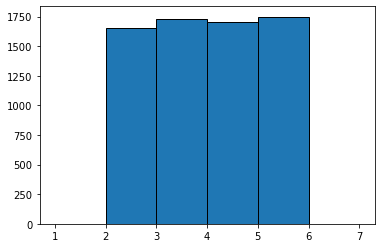

In [18]:
bins = np.arange(1,8)
plt.hist(deliveries_df["deliver_time"], bins=bins, edgecolor='black')
plt.show()

### Analiza atrybutu "deliver_company"

In [19]:
deliveries_df["delivery_company"].value_counts()

516.0    2283
360.0    2268
620.0    2259
Name: delivery_company, dtype: int64

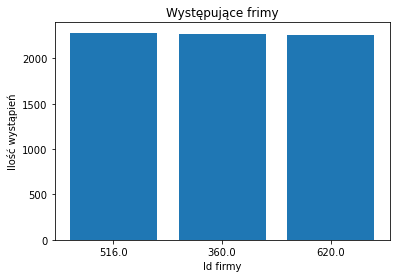

In [20]:
companies = deliveries_df["delivery_company"].value_counts()
plot_bar(series=companies, title="Występujące frimy", ylabel="Ilość wystąpień", xlabel="Id firmy")

In [21]:
deliveries_df.delivery_company.isnull().value_counts()

False    6810
True      361
Name: delivery_company, dtype: int64

In [22]:
deliveries_df[deliveries_df.delivery_company.isnull()]

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,deliver_time
8,20009,2021-03-17 06:37:28,2021-03-22 06:38:00,NaN,5.000370
17,20018,2021-01-08 18:31:25,2021-01-13 18:32:32,NaN,5.000775
20,20021,2021-05-30 01:51:59,2021-06-02 01:55:49,NaN,3.002662
23,20024,2021-03-06 06:25:49,2021-03-09 06:29:02,NaN,3.002234
44,20045,2021-03-21 12:59:41,2021-03-24 13:03:42,NaN,3.002789
...,...,...,...,...,...
7042,27043,2021-07-07 03:57:38,2021-07-12 04:01:16,NaN,5.002523
7055,27056,2021-05-29 16:25:14,2021-06-01 16:25:53,NaN,3.000451
7065,27066,2021-10-25 23:02:12,2021-10-27 23:06:02,NaN,2.002662
7104,27105,2021-10-05 22:49:15,NaT,NaN,NaN


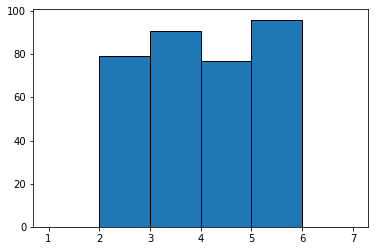

In [23]:
bins = np.arange(1,8)
plt.hist(deliveries_df[deliveries_df.delivery_company.isnull()].deliver_time, bins=bins, edgecolor='black')
plt.show()

### Analiza atrybutu "delivery_timestamp"

In [24]:
deliveries_df.delivery_timestamp.isnull().value_counts()

False    6834
True      337
Name: delivery_timestamp, dtype: int64

In [25]:
deliveries_df[deliveries_df.delivery_timestamp.isnull()]

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,deliver_time
0,20001,2021-09-12 14:40:47,NaT,620.0,NaN
21,20022,2021-03-30 18:45:15,NaT,516.0,NaN
54,20055,2021-06-08 16:47:25,NaT,360.0,NaN
65,20066,2021-01-04 10:43:12,NaT,360.0,NaN
85,20086,2021-04-09 21:24:06,NaT,620.0,NaN
...,...,...,...,...,...
7104,27105,2021-10-05 22:49:15,NaT,NaN,NaN
7120,27121,2021-09-02 10:37:06,NaT,360.0,NaN
7124,27125,2021-02-11 07:47:14,NaT,360.0,NaN
7157,27158,2021-06-08 16:14:32,NaT,360.0,NaN


### Ilość wierszy z brakującą zarówno datą dostawy, jak i firmą dostarczającą

In [26]:
filt1 = deliveries_df.delivery_timestamp.isnull()
filt2 = deliveries_df.delivery_company.isnull()
both_nan = np.where(filt1, (np.where(filt2, 1, 0)), 0).sum()
both_nan

18

W celu ułatwienia analizy została dodana kolumna "czas dostawy", która jest różnicą między datą dostarczenia i datą złożenia zamówienia, jednostką jest dzień. Najkrótszy czas dostawy wynosi 2 dni, a najdłuższy - 5 dni. Z histogramu wartości tego atrybutu wynika, że ten atrybut ma rozkład, który najbardziej przypomina rozkład jednostajny. Poza tym najwcześniej zamówienie złożono w styczniu, a najpóźniej - w październiku. Stąd wynika, że nie ma danych dotyczących pozostałych miesięcy (czyli listopada i grudnia).


W tabeli z dostawami występuje wiele braków danych. 361 wierszy nie ma firmy dostarczającej, a w 337 wierszach brakuje daty dostarczenia produktu. 18 wierszy nie ma obu tych informacji.
Został też wyznaczony histogram wartości atrybutu "czas dostawy" dla wierszy z brakującą informacją o firmie dostarczającej. Przypomina on również rozkład jednostajny, ale wartości w okolicach 5 dni wyraźnie przeważają.

## Produkty

In [27]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     319 non-null    int64  
 1   product_name   319 non-null    object 
 2   category_path  319 non-null    object 
 3   price          319 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.1+ KB


In [28]:
products_df

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
...,...,...,...,...
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00
316,1317,Plantronics Savi W740,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,-1303.96
317,1318,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,553.00


In [29]:
products_df[products_df.price <= 0]

,product_id,product_name,category_path,price
22,1023,Mass Effect 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,-89.99
29,1030,LCD Iiyama B2280WSD,Komputery;Monitory;Monitory LCD,-739.00
68,1069,LCD NEC EA224WMi,Komputery;Monitory;Monitory LCD,-979.00
96,1097,Company of Heroes Tales of Valor (PC),Gry i konsole;Gry komputerowe,-49.99
114,1115,Napoleon Total War (PC),Gry i konsole;Gry komputerowe,-34.99
169,1170,Symulator Kamieniołomu (PC),Gry i konsole;Gry komputerowe,-4.99
187,1188,Star Wars Battlefront 2 (PC),Gry i konsole;Gry komputerowe,-55.00
192,1193,Heroes Over Europe (PC),Gry i konsole;Gry komputerowe,-1.00
201,1202,Final Fantasy 14 (PC),Gry i konsole;Gry komputerowe,-135.90
210,1211,Need for Speed Shift 2 Unleashed (PC),Gry i konsole;Gry komputerowe,-27.90


In [30]:
products_df[products_df.price > 100000]

,product_id,product_name,category_path,price
19,1020,Dead Space 2 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,89000000.0
26,1027,Skate 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,56000000.0
83,1084,Sing It High School Musical 3 (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,99990000.0
109,1110,Bioshock (PC),Gry i konsole;Gry komputerowe,82900000.0
126,1127,Dark Void (PC),Gry i konsole;Gry komputerowe,41000000.0
141,1142,Toy Story Mania (PC),Gry i konsole;Gry komputerowe,23900000.0
150,1151,Mafia 2 (PC),Gry i konsole;Gry komputerowe,11900000.0
194,1195,Titan Quest (PC),Gry i konsole;Gry komputerowe,38900000.0
207,1208,Mapeciątka podróżują (PC),Gry i konsole;Gry komputerowe,13790000.0
225,1226,Supreme Commander (PC),Gry i konsole;Gry komputerowe,41900000.0


In [31]:
products_df.groupby("category_path").size().sort_values(ascending=False)

category_path
Gry i konsole;Gry komputerowe                                        202
Gry i konsole;Gry na konsole;Gry Xbox 360                             32
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                    30
Komputery;Monitory;Monitory LCD                                       17
Gry i konsole;Gry na konsole;Gry PlayStation3                          9
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne         9
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące      5
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe        4
Komputery;Tablety i akcesoria;Tablety                                  2
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4               2
Sprzęt RTV;Video;Odtwarzacze DVD                                       2
Telefony i akcesoria;Telefony komórkowe                                2
Sprzęt RTV;Audio;Słuchawki                                             1
Sprzęt RTV;Video;Telewizory i akcesor

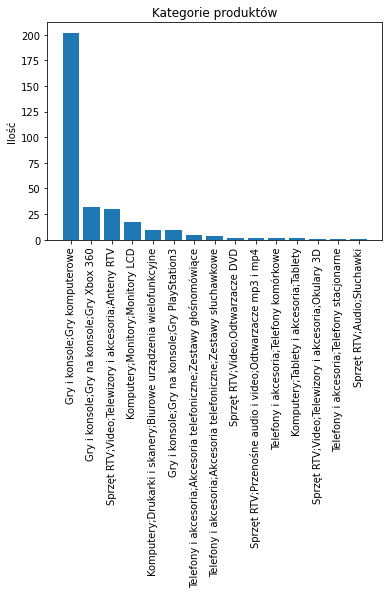

In [32]:
categories = products_df["category_path"].value_counts()
plot_bar(series=categories, title="Kategorie produktów", ylabel="Ilość", rotation=90)

W przypadku tabeli "Products" występuje 16 cen ujemnych, a dominującą klasą są "Gry komputerowe". Ponadto 12 produktów ma cenę wyższą od 100000 (najniższa z nich cena to 7900000)

## Sesje

In [33]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39269 entries, 0 to 39268
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   session_id        39269 non-null  int64         
 1   timestamp         39269 non-null  datetime64[ns]
 2   user_id           37214 non-null  float64       
 3   product_id        37371 non-null  float64       
 4   event_type        39269 non-null  object        
 5   offered_discount  39059 non-null  float64       
 6   purchase_id       7381 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 2.1+ MB


In [34]:
sessions_df.user_id.isnull().sum()

2055

In [35]:
sessions_df.product_id.isnull().sum()

1898

In [36]:
sessions_df["event_type"].value_counts()

VIEW_PRODUCT      31888
BUY_PRODUCT        7171
RETURN_PRODUCT      210
Name: event_type, dtype: int64

In [37]:
sessions_df[sessions_df.event_type == "RETURN_PRODUCT"]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
72,100018,2021-10-10 11:35:27.362751,NaN,1009.0,RETURN_PRODUCT,NaN,20013.0
472,100125,2021-07-22 12:54:48.262470,103.0,NaN,RETURN_PRODUCT,NaN,20078.0
670,100181,2021-05-08 06:13:06.060623,104.0,1283.0,RETURN_PRODUCT,NaN,20120.0
917,100247,2021-09-09 01:30:23.640711,105.0,1276.0,RETURN_PRODUCT,NaN,20167.0
1095,100290,2021-10-10 17:15:23.315240,106.0,1292.0,RETURN_PRODUCT,NaN,20196.0
...,...,...,...,...,...,...,...
37978,110082,2021-09-14 07:28:24.935583,295.0,1053.0,RETURN_PRODUCT,NaN,26908.0
38414,110205,2021-03-12 14:28:45.706929,297.0,NaN,RETURN_PRODUCT,NaN,26997.0
38940,110350,2021-03-05 00:13:34.026351,298.0,1003.0,RETURN_PRODUCT,NaN,27106.0
39021,110370,2021-09-12 07:19:54.112534,298.0,1079.0,RETURN_PRODUCT,NaN,27121.0


In [38]:
sessions_df[(sessions_df.offered_discount.isnull()) & (sessions_df.event_type != "RETURN_PRODUCT")]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id


In [39]:
sessions_df[sessions_df.session_id.duplicated()]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
1,100001,2021-02-17 09:56:53,102.0,1293.0,VIEW_PRODUCT,10.0,NaN
3,100002,2021-09-12 14:25:55,102.0,1017.0,VIEW_PRODUCT,10.0,NaN
4,100002,2021-09-12 14:28:32,102.0,1039.0,VIEW_PRODUCT,10.0,NaN
5,100002,2021-09-12 14:29:06,102.0,1032.0,VIEW_PRODUCT,10.0,NaN
6,100002,2021-09-12 14:31:38,102.0,1033.0,VIEW_PRODUCT,10.0,NaN
...,...,...,...,...,...,...,...
39264,110440,2021-08-04 14:52:31,301.0,1222.0,VIEW_PRODUCT,10.0,NaN
39265,110440,2021-08-04 14:57:08,301.0,1073.0,VIEW_PRODUCT,10.0,NaN
39266,110440,2021-08-04 14:59:44,301.0,1201.0,VIEW_PRODUCT,10.0,NaN
39267,110440,2021-08-04 15:00:40,NaN,1072.0,VIEW_PRODUCT,10.0,NaN


In [40]:
sessions_df[(sessions_df.user_id.isnull()) & (sessions_df.event_type != "VIEW_PRODUCT")]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
72,100018,2021-10-10 11:35:27.362751,NaN,1009.0,RETURN_PRODUCT,NaN,20013.0
105,100026,2021-05-08 12:17:03.000000,NaN,1277.0,BUY_PRODUCT,20.0,20020.0
228,100060,2021-03-01 18:11:07.000000,NaN,1077.0,BUY_PRODUCT,0.0,20040.0
284,100074,2021-05-16 16:37:37.000000,NaN,1318.0,BUY_PRODUCT,0.0,20049.0
300,100077,2021-01-10 08:26:53.000000,NaN,1278.0,BUY_PRODUCT,0.0,20051.0
...,...,...,...,...,...,...,...
38684,110278,2021-05-16 20:18:07.000000,NaN,1276.0,BUY_PRODUCT,10.0,27047.0
38733,110291,2021-04-23 09:35:53.000000,NaN,1076.0,BUY_PRODUCT,0.0,27059.0
38828,110316,2021-02-18 17:38:00.000000,NaN,1053.0,BUY_PRODUCT,15.0,27080.0
38923,110346,2021-10-11 06:23:49.000000,NaN,1276.0,BUY_PRODUCT,5.0,27104.0


### Statystyki użytkowników, którzy złożyli zamówienie na produkty o nieznanym id

In [71]:
prod_nan = sessions_df[sessions_df.product_id.isnull()].copy()

In [74]:
prod_nan["user_id"].value_counts()

185.0    25
159.0    24
133.0    23
188.0    22
132.0    22
         ..
300.0     1
174.0     1
222.0     1
271.0     1
284.0     1
Name: user_id, Length: 193, dtype: int64

In [75]:
(prod_nan["user_id"].value_counts()).describe()

count    193.000000
mean       9.321244
std        5.980908
min        1.000000
25%        4.000000
50%        9.000000
75%       14.000000
max       25.000000
Name: user_id, dtype: float64

### Wyznaczenie zależności braków w product_id od miesiąca złożenia zamówienia

In [96]:
prod_nan["month"] = prod_nan["timestamp"].apply(lambda x:"%d" % (x.month))
prod_nan["month"].value_counts()

7     217
5     208
6     195
3     192
8     191
1     190
9     186
4     183
10    176
2     160
Name: month, dtype: int64

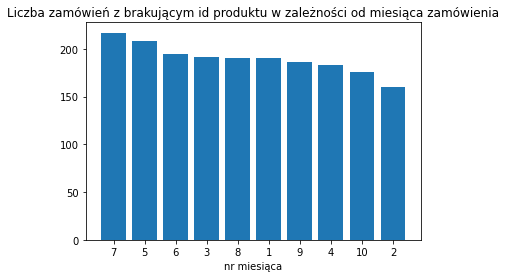

In [105]:
months = prod_nan["month"].value_counts()
plot_bar(months, title="Liczba zamówień z brakującym id produktu w zależności od miesiąca zamówienia",
         xlabel="nr miesiąca")

Z tabeli sesji wynika, że dokonano 210 zwrotów, a zakupów - 7171. Braki w atrybucie zniżka wynika z faktu, że zniżki nie były przydzielane przy zwrotach.


W tabeli tej id użytkownika brakuje w 2055 miejscach (zakładamy, że jest to niezalogowany użytkownik), id produktu natomiast brakuje w 1898 miejscach. Połowa użytkowników zamówiła co najmniej 9 produktów z nieznanym identyfikatorem, a 75% użytkowników - 14 produktów.

Z analizy zależności liczby brakujących id produktu od miesiąca wynika, że na ten brak nie wpływa nr miesiąca

# Analiza łączna

## Ta część została przeprowadzona pod kątem zależności między brakującymi atrybutami z pozostałymi. Nie uwzględniono wartości "VIEW_PRODUCT" z atrybutu event_type 

### Połączenie tabeli dostaw z tabelą sesji

In [44]:
deliv_sess_df =  pd.merge(sessions_df, deliveries_df, how='inner', on = 'purchase_id')
deliv_sess_df[deliv_sess_df.event_type == "RETURN_PRODUCT"]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,deliver_time
13,100018,2021-10-10 11:35:27.362751,NaN,1009.0,RETURN_PRODUCT,NaN,20013.0,2021-10-04 16:35:21,2021-10-09 16:37:48,620.0,5.001701
79,100125,2021-07-22 12:54:48.262470,103.0,NaN,RETURN_PRODUCT,NaN,20078.0,2021-07-11 23:58:20,2021-07-17 00:01:56,360.0,5.002500
122,100181,2021-05-08 06:13:06.060623,104.0,1283.0,RETURN_PRODUCT,NaN,20120.0,2021-05-02 11:30:28,NaT,620.0,NaN
170,100247,2021-09-09 01:30:23.640711,105.0,1276.0,RETURN_PRODUCT,NaN,20167.0,2021-08-28 22:03:09,2021-08-31 22:06:49,516.0,3.002546
200,100290,2021-10-10 17:15:23.315240,106.0,1292.0,RETURN_PRODUCT,NaN,20196.0,2021-10-05 08:14:30,2021-10-07 08:16:25,360.0,2.001331
...,...,...,...,...,...,...,...,...,...,...,...
7113,110082,2021-09-14 07:28:24.935583,295.0,1053.0,RETURN_PRODUCT,NaN,26908.0,2021-09-02 13:10:20,2021-09-06 13:12:10,516.0,4.001273
7203,110205,2021-03-12 14:28:45.706929,297.0,NaN,RETURN_PRODUCT,NaN,26997.0,2021-03-02 22:19:59,2021-03-06 22:21:26,516.0,4.001007
7313,110350,2021-03-05 00:13:34.026351,298.0,1003.0,RETURN_PRODUCT,NaN,27106.0,2021-02-22 20:20:57,2021-02-24 20:24:24,516.0,2.002396
7329,110370,2021-09-12 07:19:54.112534,298.0,1079.0,RETURN_PRODUCT,NaN,27121.0,2021-09-02 10:37:06,NaT,360.0,NaN


### Wyznaczenie histogramu czasu dostawy zamówień zwróconych 

In [80]:
deliv_sess_df[deliv_sess_df.event_type == "RETURN_PRODUCT"].deliver_time.value_counts()

4.001273    3
3.001678    2
5.001308    2
3.002824    2
5.001701    2
           ..
5.002535    1
3.000660    1
2.002072    1
4.001991    1
3.000903    1
Name: deliver_time, Length: 190, dtype: int64

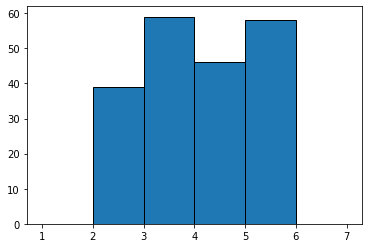

In [81]:
bins = np.arange(1,8)
a_df = deliv_sess_df[deliv_sess_df.event_type == "RETURN_PRODUCT"]
plt.hist(a_df["deliver_time"], bins=bins, edgecolor='black')
plt.show()

### Wnioski

Czas dostawy z nieparzystą ilością dni częściej spotykał się ze zwrotem produktu, jednak na tej podstawie nie można wywnioskować, że jeśli czas dostawy w dniach jest nieparzysty, to produkt zostanie zwrócony.

## Dodanie tabeli produktów do tabel z dostawami i sesjami

In [54]:
deliv_sess_prod_df = pd.merge(deliv_sess_df, products_df, how='inner', on = 'product_id')
deliv_sess_prod_df

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,deliver_time,product_name,category_path,price
0,100002,2021-09-12 14:40:47,102.0,1037.0,BUY_PRODUCT,10.0,20001.0,2021-09-12 14:40:47,NaT,620.0,NaN,LCD Asus VK248H,Komputery;Monitory;Monitory LCD,799.0
1,100518,2021-05-16 16:34:31,109.0,1037.0,BUY_PRODUCT,10.0,20354.0,2021-05-16 16:34:31,2021-05-21 16:36:04,516.0,5.001076,LCD Asus VK248H,Komputery;Monitory;Monitory LCD,799.0
2,101646,2021-01-05 02:33:51,130.0,1037.0,BUY_PRODUCT,15.0,21111.0,2021-01-05 02:33:51,2021-01-09 02:37:06,620.0,4.002257,LCD Asus VK248H,Komputery;Monitory;Monitory LCD,799.0
3,101782,2021-05-30 12:32:05,132.0,1037.0,BUY_PRODUCT,10.0,21205.0,2021-05-30 12:32:05,2021-06-03 12:36:46,516.0,4.003252,LCD Asus VK248H,Komputery;Monitory;Monitory LCD,799.0
4,101838,2021-07-12 10:20:25,133.0,1037.0,BUY_PRODUCT,20.0,21246.0,2021-07-12 10:20:25,2021-07-14 10:23:26,620.0,2.002095,LCD Asus VK248H,Komputery;Monitory;Monitory LCD,799.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,109106,2021-06-13 18:17:35,274.0,1084.0,BUY_PRODUCT,15.0,26231.0,2021-06-13 18:17:35,NaT,516.0,NaN,Sing It High School Musical 3 (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,99990000.0
7016,109367,2021-10-25 06:18:03,282.0,1084.0,BUY_PRODUCT,10.0,26416.0,2021-10-25 06:18:03,2021-10-30 06:21:54,516.0,5.002674,Sing It High School Musical 3 (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,99990000.0
7017,109448,2021-07-28 13:04:09,283.0,1084.0,BUY_PRODUCT,15.0,26470.0,2021-07-28 13:04:09,2021-08-01 13:08:31,620.0,4.003032,Sing It High School Musical 3 (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,99990000.0
7018,109759,2021-09-08 23:38:35,290.0,1084.0,BUY_PRODUCT,20.0,26691.0,2021-09-08 23:38:35,2021-09-13 23:42:36,516.0,5.002789,Sing It High School Musical 3 (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,99990000.0


### Liczba zamówień w zależności od kategorii

In [98]:
deliv_sess_prod_df["category_path"].value_counts()

Komputery;Monitory;Monitory LCD                                      534
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne       527
Gry i konsole;Gry komputerowe                                        487
Sprzęt RTV;Video;Odtwarzacze DVD                                     486
Telefony i akcesoria;Telefony stacjonarne                            478
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4             468
Telefony i akcesoria;Telefony komórkowe                              457
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe      452
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                   451
Gry i konsole;Gry na konsole;Gry Xbox 360                            448
Komputery;Tablety i akcesoria;Tablety                                448
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D                   447
Gry i konsole;Gry na konsole;Gry PlayStation3                        446
Sprzęt RTV;Audio;Słuchawki                         

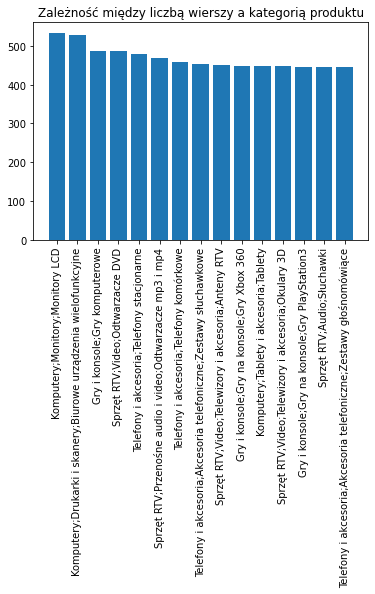

In [100]:
categories = deliv_sess_prod_df["category_path"].value_counts()
plot_bar(categories, rotation=90, 
         title="Zależność między liczbą wierszy a kategorią produktu")

### Wyznaczenie zależności braków w delivery_timestamp od kategorii produktu

In [91]:
deliv_sess_prod_df[deliv_sess_prod_df.delivery_timestamp.isnull()].category_path.value_counts()

Gry i konsole;Gry komputerowe                                        34
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne       26
Telefony i akcesoria;Telefony komórkowe                              25
Gry i konsole;Gry na konsole;Gry PlayStation3                        25
Komputery;Tablety i akcesoria;Tablety                                25
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące    23
Sprzęt RTV;Video;Odtwarzacze DVD                                     22
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D                   22
Komputery;Monitory;Monitory LCD                                      21
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe      20
Telefony i akcesoria;Telefony stacjonarne                            19
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4             18
Sprzęt RTV;Audio;Słuchawki                                           18
Gry i konsole;Gry na konsole;Gry Xbox 360                       

In [106]:
(deliv_sess_prod_df[deliv_sess_prod_df.delivery_timestamp.isnull()].category_path.value_counts()).sum()

330

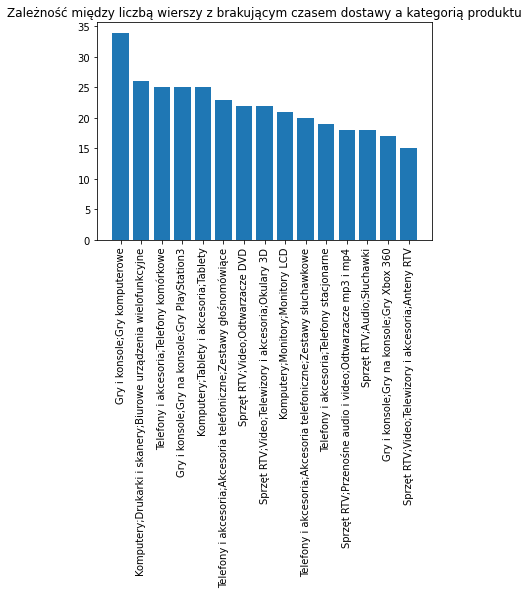

In [94]:
categories = deliv_sess_prod_df[deliv_sess_prod_df.delivery_timestamp.isnull()].category_path.value_counts()
plot_bar(categories, rotation=90, 
         title="Zależność między liczbą wierszy z brakującym czasem dostawy a kategorią produktu")

### Wyznaczenie zależności braków w delivery_company od kategorii produktu

In [55]:
deliv_sess_prod_df[deliv_sess_prod_df.delivery_company.isnull()].category_path.value_counts()

Komputery;Monitory;Monitory LCD                                      31
Telefony i akcesoria;Telefony stacjonarne                            31
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne       31
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                   28
Gry i konsole;Gry na konsole;Gry Xbox 360                            28
Telefony i akcesoria;Telefony komórkowe                              26
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D                   24
Gry i konsole;Gry na konsole;Gry PlayStation3                        23
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4             22
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące    22
Sprzęt RTV;Video;Odtwarzacze DVD                                     20
Gry i konsole;Gry komputerowe                                        20
Komputery;Tablety i akcesoria;Tablety                                20
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe 

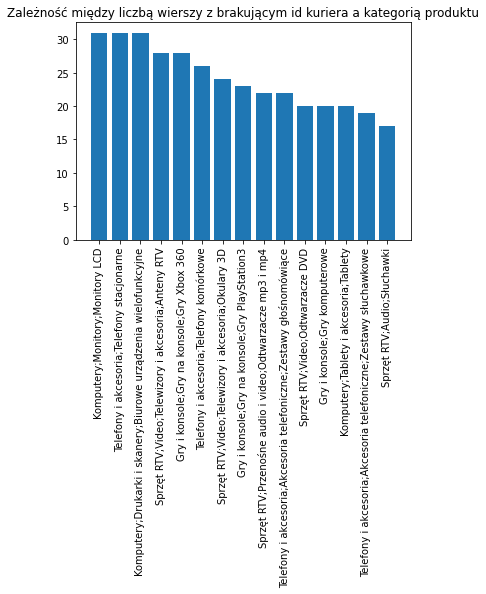

In [93]:
categories = deliv_sess_prod_df[deliv_sess_prod_df.delivery_company.isnull()].category_path.value_counts()
plot_bar(categories, rotation=90, 
         title="Zależność między liczbą wierszy z brakującym id kuriera a kategorią produktu")

### Wnioski

W przypadku braków w czasie dostarczenia zamówienia widoczne jest odstawanie liczby zamówień z kategorii "Gry komputerowe" w porównaniu z innymi kategoriami, jednak stanowi to ok. 10% wszystkich wierszy z tym błędem. W pozostałych przypadkach taka sytuacja nie zachodzi

## Dodanie tabeli użytkowników do tabel z dostawami i sesjami

In [58]:
deliv_sess_user_df = pd.merge(deliv_sess_df, users_df, how='inner', on = 'user_id')
deliv_sess_user_df

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,deliver_time,name,city,street
0,100002,2021-09-12 14:40:47,102.0,1037.0,BUY_PRODUCT,10.0,20001.0,2021-09-12 14:40:47,NaT,620.0,NaN,Nela Pawlos,Szczecin,plac Traugutta 217
1,100003,2021-03-02 16:49:15,102.0,1233.0,BUY_PRODUCT,10.0,20002.0,2021-03-02 16:49:15,2021-03-04 16:53:37,620.0,2.003032,Nela Pawlos,Szczecin,plac Traugutta 217
2,100004,2021-03-31 09:55:45,102.0,1318.0,BUY_PRODUCT,20.0,20003.0,2021-03-31 09:55:45,2021-04-03 09:57:37,360.0,3.001296,Nela Pawlos,Szczecin,plac Traugutta 217
3,100005,2021-03-21 18:03:57,102.0,1318.0,BUY_PRODUCT,0.0,20004.0,2021-03-21 18:03:57,2021-03-25 18:04:38,516.0,4.000475,Nela Pawlos,Szczecin,plac Traugutta 217
4,100007,2021-01-14 18:48:41,102.0,1233.0,BUY_PRODUCT,5.0,20005.0,2021-01-14 18:48:41,2021-01-19 18:52:53,516.0,5.002917,Nela Pawlos,Szczecin,plac Traugutta 217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,110435,2021-09-08 13:39:46,301.0,1283.0,BUY_PRODUCT,0.0,27167.0,2021-09-08 13:39:46,2021-09-13 13:39:59,360.0,5.000150,Mieszko Szczepaniuk,Wrocław,pl. Popiełuszki 13/85
6988,110436,2021-02-05 12:13:27,301.0,1283.0,BUY_PRODUCT,20.0,27168.0,2021-02-05 12:13:27,2021-02-07 12:14:48,360.0,2.000938,Mieszko Szczepaniuk,Wrocław,pl. Popiełuszki 13/85
6989,110437,2021-10-10 11:04:13,301.0,1278.0,BUY_PRODUCT,0.0,27169.0,2021-10-10 11:04:13,2021-10-13 11:05:03,516.0,3.000579,Mieszko Szczepaniuk,Wrocław,pl. Popiełuszki 13/85
6990,110438,2021-07-27 09:49:23,301.0,1291.0,BUY_PRODUCT,20.0,27170.0,2021-07-27 09:49:23,2021-08-01 09:52:10,620.0,5.001933,Mieszko Szczepaniuk,Wrocław,pl. Popiełuszki 13/85


### Liczba zamówień w zależności od miasta

In [59]:
deliv_sess_user_df["city"].value_counts()

Kraków      1352
Gdynia      1111
Szczecin     990
Poznań       973
Radom        948
Wrocław      818
Warszawa     800
Name: city, dtype: int64

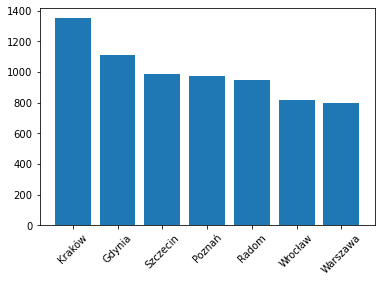

In [85]:
cities = deliv_sess_user_df["city"].value_counts()
plot_bar(cities, rotation=45)

### Liczba wierszy z brakującym delivery_timestamp w zależności od miasta

In [89]:
deliv_sess_user_df[deliv_sess_user_df.delivery_timestamp.isnull()].city.value_counts()

Kraków      62
Gdynia      50
Radom       50
Szczecin    50
Poznań      40
Wrocław     37
Warszawa    37
Name: city, dtype: int64

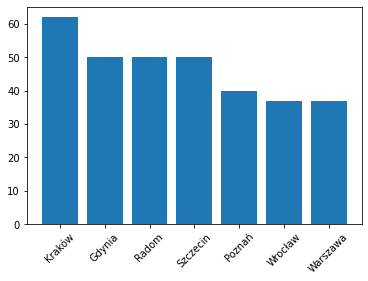

In [90]:
cities = deliv_sess_user_df[deliv_sess_user_df.delivery_timestamp.isnull()].city.value_counts()
plot_bar(cities, rotation=45)

### Liczba wierszy z brakującym delivery_company w zależności od miasta

In [60]:
deliv_sess_user_df[deliv_sess_user_df.delivery_company.isnull()].city.value_counts()

Kraków      72
Szczecin    52
Gdynia      49
Wrocław     49
Radom       47
Poznań      47
Warszawa    39
Name: city, dtype: int64

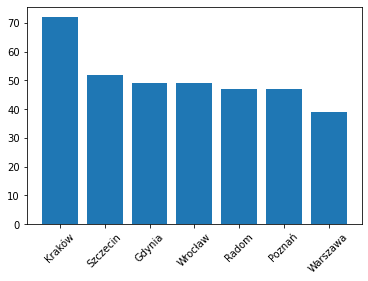

In [86]:
cities = deliv_sess_user_df[deliv_sess_user_df.delivery_company.isnull()].city.value_counts()
plot_bar(cities, rotation=45)

### Liczba wierszy z brakującym product_id w zależności od miasta

In [88]:
deliv_sess_user_df[deliv_sess_user_df.product_id.isnull()].city.value_counts()

Kraków      74
Szczecin    54
Poznań      48
Radom       47
Wrocław     42
Warszawa    41
Gdynia      37
Name: city, dtype: int64

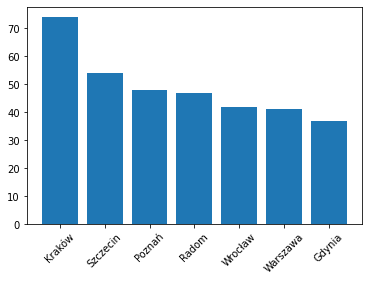

In [87]:
cities = deliv_sess_user_df[deliv_sess_user_df.product_id.isnull()].city.value_counts()
plot_bar(cities, rotation=45)

### Wnioski

Nie zauważono tutaj żadnych zależności oprócz takiej, że wraz z ilością zamówień, wzrasta liczba wierszy z błędami

# Podsumowanie

- Powyższy zbiór danych nie jest reprezentatywny ze względu na brak danych z listopada i grudnia oraz występowania informacji o użytkownikach tylko z kilku miast (nie ze wszystkich województw)
- Braki w id użytkowników oraz w proponowanej zniżce wynikają z założeń działania sklepu - niezarejestrowani użytkownicy nie mają swojego id oraz przy zwrotach nie jest proponowana zniżka
- Nie udało się natomiast wykryć zależności między brakami w atrybutach: czas dostawy, id firmy kurierskiej, id produktu od innych atrybutów
- W tym zbiorze danych występują błędy logiczne - cena produktu nie może być ujemna oraz produkty z tego sklepu nie powinny miec ceny rzędu miliona